## Wrangle and Analyze - WeRateDogs Tweets

### Introduction

The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

### Gathering Data

 - The WeRateDogs Twitter archive i.e twitter_archive_enhanced.csv (available in the project file).

 - The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a    neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically      using the Requests library and the following URL: 
   https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
   
 - Python's Tweepy library to gather each tweet's retweet count and favorite ("like") count.

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy 
import json

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Read Image prediction file

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
images = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(images.content)

335079

In [4]:
images_predict = pd.read_csv('image_predictions.tsv', sep = '\t')
images_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Let's gather retweet count as well as the like count

In [5]:
# Enter Your Key ,token..
auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
tweet_ids = twitter_archive.tweet_id.values

tweets_data = []
tweet_success = []

for id in tweet_ids:
        try:
            data = api.get_status(id, tweet_mode='extended',wait_on_rate_limit = True,wait_on_rate_limit_notify = True)
            tweets_data.append(data)
            tweet_success.append(id)
        except:
            continue

Rate limit reached. Sleeping for: 734
Rate limit reached. Sleeping for: 732


Store data to json_tweet.txt

In [7]:
with open('json_tweet.txt', mode = 'w') as file:
    json.dump(tweets_data, file)

In [8]:
twitter_counts_df = pd.read_json('json_tweet.txt')
twitter_counts_df['tweet_id'] = tweet_success
twitter_counts_df = twitter_counts_df[['tweet_id', 'favorite_count', 'retweet_count']]

In [9]:
twitter_counts_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36232,7712
1,892177421306343426,31257,5699
2,891815181378084864,23534,3778
3,891689557279858688,39536,7876
4,891327558926688256,37751,8485


Let's Assess the data. In this section we will check for Quality as well as Tidiness issues.

## Quality Issues 

We will check for missing data, inaccurate data as well as for data consistency.

   ### twitter_archive  

   -  missing data in the columns: in_reply_to_status_id, in_reply_to_user_id,
      retweeted_status_id, retweeted_status_user_id,
      retweeted_status_timestamp, expanded_urls
   -  tweet_id is an int 
   -  timestamp is an object
   -  retweeted_status_timestamp is also an object
   -  some dogs have 'None' as a name, or 'a', or 'an'
   -  this dataset includes retweets, which indicates that there is duplicated
      data
   -  rating_denominator have multitude of other values other than 10.
   -  source column still has the HTML tags
   
   ### images_predict

   -  Some columns have invalid data.
   -  Data inconsistency- dog breed listed is all lowercase but sometimes it is
      written in sentence case.
      
      
   ### twitter_counts_df

   -  Missing values 


## Tidiness issues 

   - We will check whether each variable forms a column 
   - We will check whether each variable forms a row.

Let the analysis begins

In [10]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive['name'].value_counts().head(10)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Name: name, dtype: int64

In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_counts_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36232,7712
1,892177421306343426,31257,5699
2,891815181378084864,23534,3778
3,891689557279858688,39536,7876
4,891327558926688256,37751,8485


In [16]:
twitter_counts_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7567.292149,2705.740884
std,6.823170e+16,11746.078535,4575.361763
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1319.500000,548.000000
50%,7.182469e+17,3288.000000,1268.000000
75%,7.986692e+17,9264.500000,3143.500000
max,8.924206e+17,156323.000000,77859.000000


In [17]:
twitter_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [18]:
twitter_counts_df.retweet_count.mean()

2705.7408837408839

In [19]:
twitter_counts_df.favorite_count.mean()

7567.2921492921496

In [20]:
images_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
from IPython.display import Image 

Image(url = 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg')

Just checking for the images Hehe..

In [22]:
images_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
images_predict['p1'].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

In [24]:
images_predict['p2'].value_counts().head(10)

Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
French_bulldog               41
Chesapeake_Bay_retriever     41
toy_poodle                   37
cocker_spaniel               34
miniature_poodle             33
Name: p2, dtype: int64

In [25]:
images_predict['p3'].value_counts().head(10)

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
chow                         32
Staffordshire_bullterrier    32
beagle                       31
cocker_spaniel               31
Name: p3, dtype: int64

## Clean

Lets clean our datasets. Our cleaning approach includes :

   - Define 
   - Code
   - Test

#### Note :-
Before cleaning, we should always make a copy of our dataframes

In [26]:
twitter_archive_clean = twitter_archive.copy()
images_predict_clean = images_predict.copy()
twitter_counts_df_clean = twitter_counts_df.copy()

#### Define
   - Merge the clean versions of twiter_archive, images_predict, and
     twitter_counts_df.
   - Create one column for the various dog types: doggo, floofer, pupper, puppo
     Remove columns no longer needed: in_reply_to_status_id,
     in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and
     retweeted_status_timestamp
   - Delete retweets
   - Remove columns no longer needed
   - Change tweet_id from an integer to a string
   - Change the timestamp to correct datetime format
   - Correct naming issues
   - Standardize dog ratings
   - Create a dog_breed column.

#### Code & Test 
I always prefer coding and testing simultaneously as it avoid mistakes in the initial stage.

#### Merging cleaner version of our dataframes

In [27]:
from functools import reduce

df2 = [twitter_archive_clean, images_predict_clean, twitter_counts_df_clean]
df_twitter = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), df2)

In [28]:
df_twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36232,7712
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,31257,5699
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23534,3778


In [29]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

#### Create a column for the dog types

In [30]:
df_twitter['dog_type'] = df_twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

As I said above, after the coding, let's test our corrections.

In [31]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,36232,7712,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,31257,5699,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,23534,3778,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39536,7876,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37751,8485,NaN


In [32]:
df_twitter.dog_type.value_counts()

pupper     230
doggo       73
puppo       28
floofer      3
Name: dog_type, dtype: int64

#### Delete Re-tweets

In [33]:
df_twitter = df_twitter[np.isnan(df_twitter.retweeted_status_id)]

In [34]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 31 columns):
tweet_id                      1987 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
doggo                         1987 non-null object
floofer                       1987 non-null object
pupper                        1987 non-null object
puppo                         1987 non-null object
jpg_url                       1987 non

So, we can see above that there are no re-tweet entries in our dataframe. 

Next step is to delete the following columns:
retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

In [35]:
df_twitter = df_twitter.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [36]:
df_twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,36232,7712,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,31257,5699,NaN


#### Remove unwanted columns

In [37]:
df_twitter.drop(['in_reply_to_status_id','in_reply_to_user_id','source','img_num'], axis = 1, inplace=True)
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
jpg_url               1987 non-null object
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null b

#### Change tweet_id to string

In [38]:
df_twitter['tweet_id'] = df_twitter['tweet_id'].astype(str)
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
jpg_url               1987 non-null object
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null 

#### Convert Timestamps to datetime format

First we have to remove the timezone at the end of Timestamp and after that we will convert it to date time object.

In [39]:
df_twitter['timestamp'] = df_twitter['timestamp'].str.slice(start=0, stop=-6)
df_twitter['timestamp'] = pd.to_datetime(df_twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

df_twitter.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,36232,7712,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,31257,5699,NaN


In [40]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
jpg_url               1987 non-null object
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 n

#### Correct issues with the names

In [41]:
df_twitter.name = df_twitter.name.str.replace('^[a-z]+', 'None')

df_twitter['name'].value_counts()

None          644
Cooper         10
Charlie        10
Oliver         10
Tucker          9
Lucy            9
Penny           9
Winston         8
Sadie           8
Toby            7
Daisy           7
Lola            7
Bella           6
Bo              6
Jax             6
Koda            6
Stanley         6
Buddy           5
Rusty           5
Scout           5
Leo             5
Bailey          5
Oscar           5
Milo            5
Chester         5
Dave            5
Louis           5
Derek           4
Duke            4
George          4
             ... 
Amy             1
Christoper      1
Smiley          1
Brat            1
Randall         1
Autumn          1
Kawhi           1
Jeffrie         1
Tassy           1
Sprout          1
Reptar          1
Schnitzel       1
Bowie           1
Grizz           1
Moreton         1
Jessiga         1
Akumi           1
Rumble          1
Jebberson       1
Lillie          1
Buckley         1
Cecil           1
Evy             1
Stormy          1
Iggy      

#### Standardize dog ratings

In [42]:
df_twitter['rating_numerator'] = df_twitter['rating_numerator'].astype(float)
df_twitter['rating_denominator'] = df_twitter['rating_denominator'].astype(float)

df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null float64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
jpg_url               1987 non-null object
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                19

Now, we will use Regular Expressions (re) to extract text, indices and ratings for all the tweets that contain a decimal in the numerator of the rating.

In [43]:
import re

In [44]:
decimal_ratings_text = []
decimal_ratings_index = []
decimal_ratings = []

for index, text in df_twitter['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        decimal_ratings_text.append(text)
        decimal_ratings_index.append(index)
        decimal_ratings.append(re.search('\d+\.\d+', text).group())

In [45]:
print(decimal_ratings_index)
print(decimal_ratings)

[40, 548, 603, 1438]
['13.5', '9.75', '11.27', '11.26']


In [46]:
df_twitter.loc[decimal_ratings_index[0],'rating_numerator'] = float(decimal_ratings[0])
df_twitter.loc[decimal_ratings_index[1],'rating_numerator'] = float(decimal_ratings[1])
df_twitter.loc[decimal_ratings_index[2],'rating_numerator'] = float(decimal_ratings[2])

In [47]:
decimal_ratings_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

Lets create a new column called rating and calulate the value with standardized ratings.

In [48]:
df_twitter['rating'] = df_twitter['rating_numerator'] / df_twitter['rating_denominator']

In [49]:
df_twitter.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,bagel,0.085851,False,banana,0.076110,False,36232,7712,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,31257,5699,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,23534,3778,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,39536,7876,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37751,8485,NaN,1.2


In [50]:
df_twitter.rating.describe()

count    1987.000000
mean        1.165393
std         4.071579
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

#### Create a dog_breed column.

In [51]:
df_twitter['dog_breed'] = 'None'

for i, j in df_twitter.iterrows():

    if j.p1_dog:
        df_twitter.set_value(i, 'dog_breed', j.p1)
    elif j.p2_dog and j.rating_numerator >= 10:
        df_twitter.set_value(i, 'dog_breed', j.p2)
    elif j.p3_dog and j.rating_numerator >= 10:
        df_twitter.set_value(i, 'dog_breed', j.p3)
    else:
        df_twitter.set_value(i, 'dog_breed', 'None')
        

df_twitter.dog_breed.value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


None                          365
golden_retriever              156
Labrador_retriever            105
Pembroke                       94
Chihuahua                      85
pug                            60
toy_poodle                     48
chow                           46
Samoyed                        41
Pomeranian                     40
malamute                       33
cocker_spaniel                 30
French_bulldog                 29
Chesapeake_Bay_retriever       29
miniature_pinscher             23
German_shepherd                21
Siberian_husky                 20
Eskimo_dog                     20
Staffordshire_bullterrier      20
Maltese_dog                    19
Shetland_sheepdog              19
beagle                         19
Cardigan                       19
Rottweiler                     18
Shih-Tzu                       18
kuvasz                         17
Italian_greyhound              17
Lakeland_terrier               16
basset                         16
Great_Pyrenees

# Storing, Analyzing and Visualizing Data

   - Most popular dog breed
   - The total number of tweets over time
   - Most popular dog name

Store the clean dataFrame in a CSV file

In [52]:
df_twitter.to_csv('twitter_final_dataset.csv', encoding='utf-8', index=False)

### Most Popular Dog Breed is Golden Retriever 

Start plotting from 1 so to remove the None value.

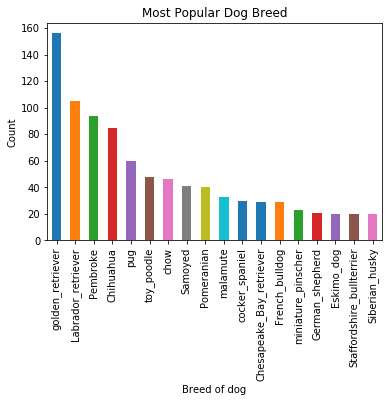

In [66]:
breeds = df_twitter.groupby('dog_breed').filter(lambda x: len(x) >= 20)

breeds['dog_breed'].value_counts()[1:].plot(kind = 'bar')
plt.title('Most Popular Dog Breed')
plt.ylabel('Count')
plt.xlabel('Breed of dog');

### The total number of tweets over time.

In [54]:
df_twitter.timestamp = pd.to_datetime(df_twitter['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

tweets_count = df_twitter.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
tweets_count = tweets_count[['timestamp', 'tweet_id']]
tweets_count.sum()

tweet_id    1987
dtype: int64

In [55]:
import datetime

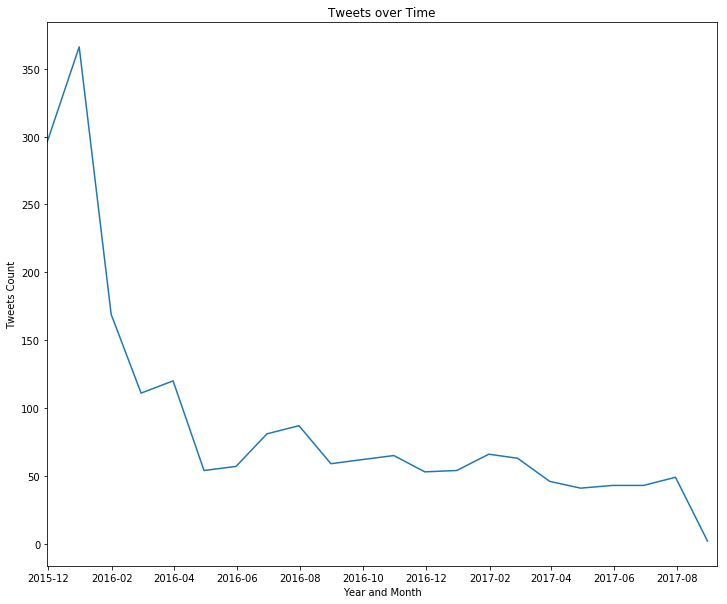

In [68]:
plt.figure(figsize=(12, 10))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 9, 9)]) 

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(tweets_count.timestamp, tweets_count.tweet_id)
plt.title('Tweets over Time');

We can see that, with time, tweets decreases over time.

### Most popular dog name

While using counts for plotting, we used 1 as starting number to ignore None.

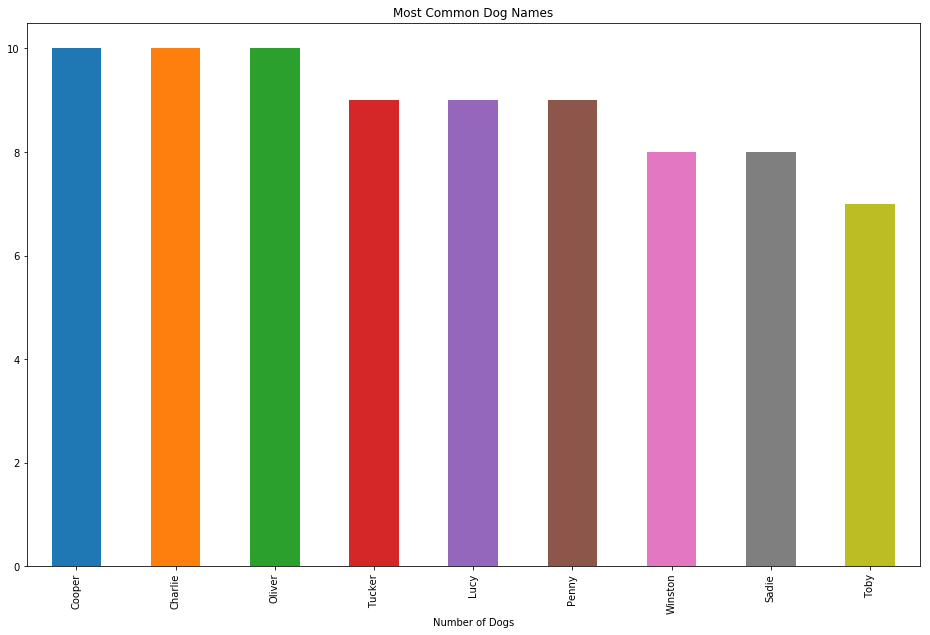

In [64]:
df_twitter.name.value_counts()[1:10].plot('bar', figsize=(16,10))
plt.title('Most Common Dog Names')
plt.xlabel("Number of Dogs");

Most popular dog name are **Cooper** , **Charlie** & **Oliver**.

# Thank You